# Ford GoBike System Review
## by Onyeukwu Stephen

## Investigation Overview

> The main focus in this presentation is trip duration across days of the week, hours of the day as well as the user type present in Ford Gobike.


## Dataset Overview

> The Ford GoBike System Dataset is a dataset that provides information about the bike sharing service provided by Ford GoBike. The data includes information about bike trips such as the start and end time, start and end station, trip duration, and user type. It also includes information about the user, such as their age, gender, and type of subscription. The dataset can be used to analyze and understand the usage patterns and preferences of Ford GoBike users. Some common use cases for this dataset include analyzing the demand for bike sharing services, identifying the busiest stations and times, and understanding the demographic of users.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe, Note dataset has been cleaned before importing.
bike_data = pd.read_csv("fordgobike_tripdata_clean.csv")

## Percentage of User type
>In February 2019, subscribers accounted for the vast majority of bike usage, approximately 91%, while customers accounted for approximately 9%.

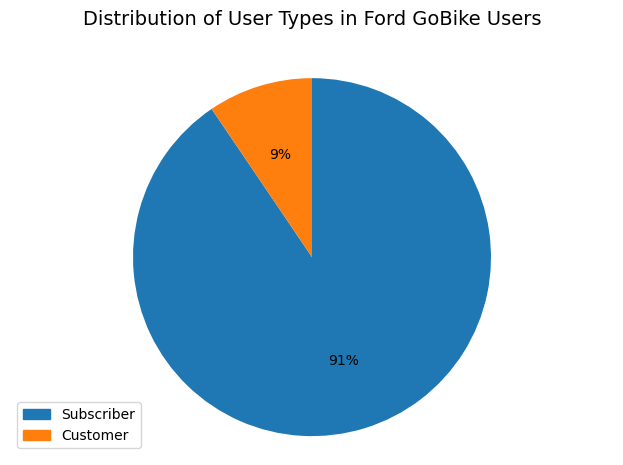

In [3]:
import matplotlib.patches as mpatches

# Use a color palette
colors = ['#1f77b4', '#ff7f0e']

# Plot the pie chart
sorted_counts = bike_data['user_type'].value_counts()
plt.pie(sorted_counts, autopct='%1.0f%%', startangle=90, counterclock = False, colors=colors)

# Add a legend
custom_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, sorted_counts.index)]
plt.legend(handles=custom_patches, loc='lower left')

# Increase font size
plt.title("Distribution of User Types in Ford GoBike Users", fontsize=14, y=1.07)
plt.rc('font', size=12)

plt.axis('equal') # Change to 'equal' to ensure the pie chart is a circle
plt.tight_layout() # add tight layout to ensure the title and labels are fully visible

plt.show()


## Distribution of Rides by Day
>Thursday and Tuesday had the highest number of rides, the least number of rides are taken o weekends.


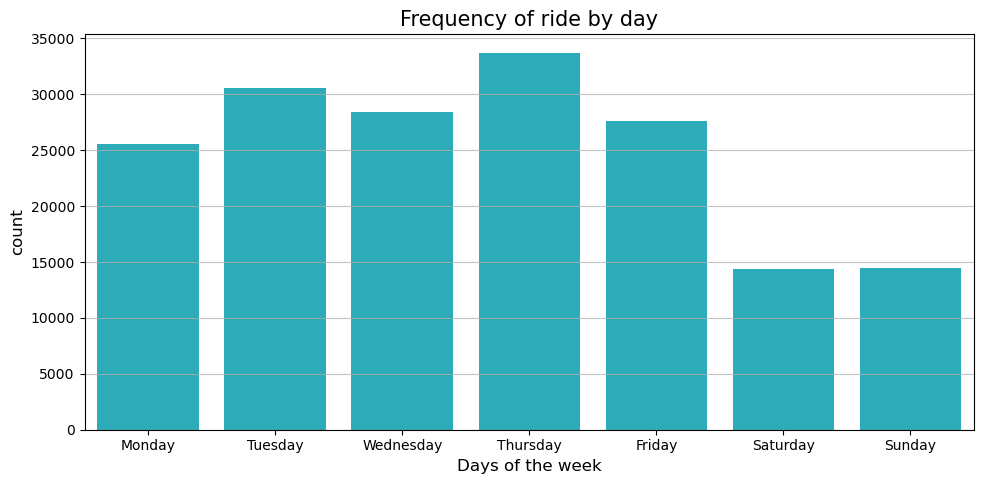

In [4]:
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
base_color = sns.color_palette()[-1]

plt.figure(figsize=[10,5]) # set the figure size
sns.countplot(data = bike_data, x = 'start_day_of_week', order = week_order, color = base_color)

# add a title and labels
plt.title('Frequency of ride by day', fontsize = 15)
plt.xlabel('Days of the week', fontsize = 12)
plt.ylabel('count', fontsize = 12)

# add tick marks and labels
plt.xticks(fontsize=10, rotation=0) 
plt.yticks(fontsize=10)

# add grid
plt.grid(axis='y', alpha=0.75)

# tighten the plot layout
plt.tight_layout()

plt.show()

## Distribution of Rides by Hour
- During the daytime, the number of trips peak from around 7am to 9pm which is the usual morning rushours 
- During the evening time the trip peaks from 4pm to 7pm (evening rush hours).



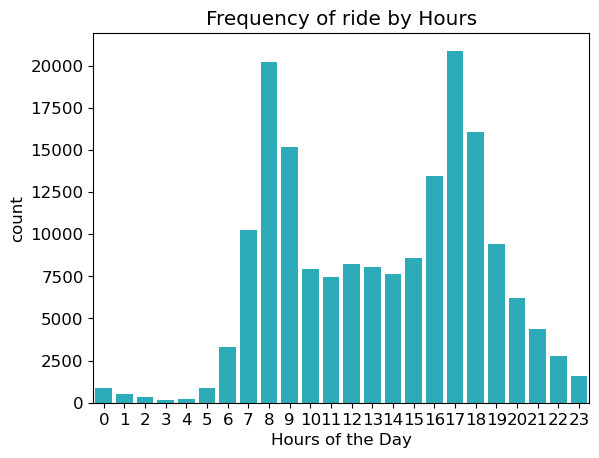

In [5]:
color = sns.color_palette()[-1]
sns.countplot(data = bike_data, x = 'start_hour_of_day', color = color)
plt.xlabel('Hours of the Day')
plt.title('Frequency of ride by Hours');

## Distribution of Rides across user type
>Compared to subscribers, customers tend to spend more time on each trip.


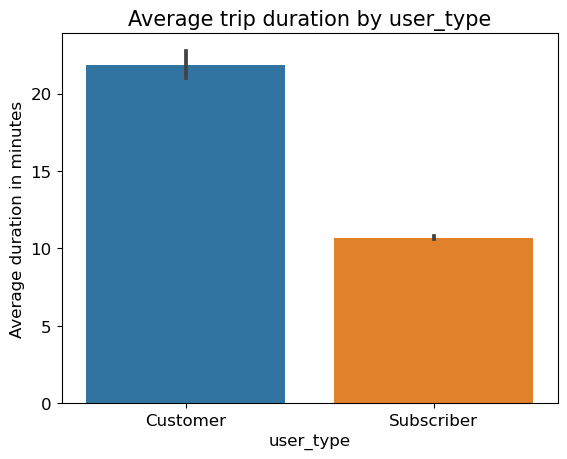

In [6]:
# Plotting the bar plot using seaborn library
sns.barplot(data=bike_data, x = 'user_type', y= 'duration_mins')

# Adding x-axis label
plt.xlabel('user_type', fontsize=12)

# Adding y-axis label
plt.ylabel('Average duration in minutes', fontsize=12)

# Adding title to the plot
plt.title('Average trip duration by user_type', fontsize = 15)

# Increasing size of the title font
plt.rcParams["axes.titlesize"] = 20

# Increasing size of the axis labels font
plt.rcParams["axes.labelsize"] = 15

# Increasing size of the tick labels font
plt.tick_params(labelsize=12)

# Showing the plot
plt.show()

## Variation of trip duration across days and user type
>Compared to regular customers, subscribers take faster trips every day of the week. The duration of trips tends to increase on weekends for both user categories, particularly for customers. The average trip time for subscribers is notably more consistent from Monday to Friday, compared to all customers.

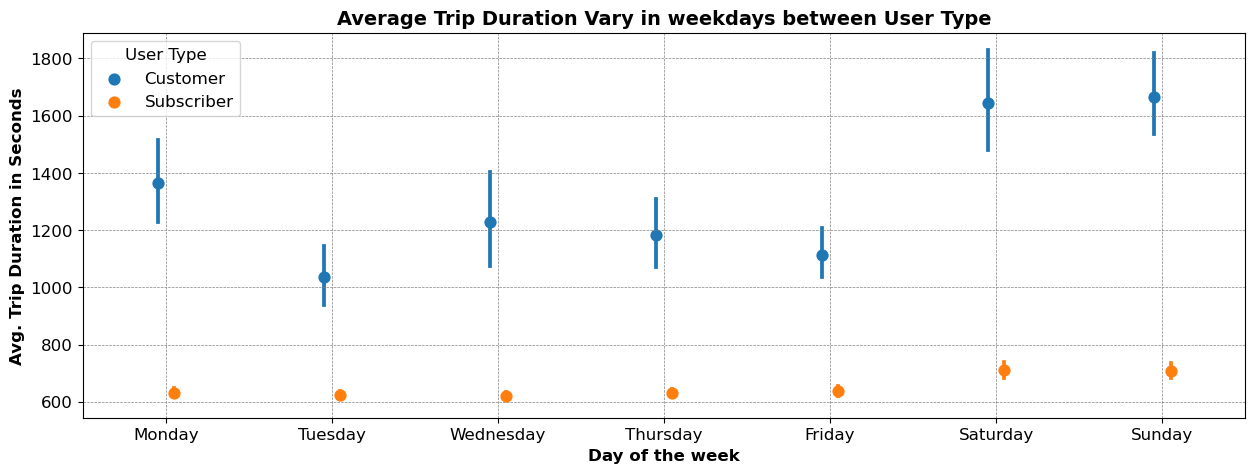

In [7]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.pointplot(data=bike_data, x='start_day_of_week', y='duration_sec', hue='user_type', dodge=0.1, linestyles="", ax=ax,order = week_order)

ax.set_xlabel('Day of the week', fontsize=12, fontweight='bold')
ax.set_ylabel('Avg. Trip Duration in Seconds', fontsize=12, fontweight='bold')
ax.set_title('Average Trip Duration Vary in weekdays between User Type', fontsize=14, fontweight='bold')

ax.legend(title='User Type', fontsize=12)
ax.grid(color='gray', linestyle='--', linewidth=0.5)

plt.show()

In [8]:
!jupyter nbconvert Ford_Go_Bike_Data_Part_2_Slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Ford_Go_Bike_Data_Part_2_Slide_deck.ipynb to slides
[NbConvertApp] Writing 799898 bytes to Ford_Go_Bike_Data_Part_2_Slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Owner\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\Owner\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\Owner\anaconda3\Scripts\jupyter-nbconvert.EXE\__main__.py", line 7, in <module>
  File "C:\Users\Owner\anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\Owner\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Owner\anaconda3\lib\site-packages\nbconvert\nbconve